# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# creo el cvs a tratar

In [2]:
import pandas as pd
#malicious_data = pd.read_csv("TraficoMalo.csv")
#non_malicious_data = pd.read_csv("TraficoBueno.csv")
#malicious_data = pd.read_csv("TraficoMaloCompleto.csv")
#non_malicious_data = pd.read_csv("TraficoBuenoCompleto.csv")


malicious_data = pd.read_csv("1000sampling.csv")
non_malicious_data = pd.read_csv("Traficobueno1000.csv")


# Limpieza de características

In [3]:
#Elimina datos
#columnas_a_eliminar = ['exaddr','engine_type','engine_id','dst_mask','src_mask', 'dst_mask','src_as','dst_as','#:unix_secs','unix_nsecs','sysuptime','first','last','nexthop']
columnas_a_eliminar = ['srcaddr','dstaddr','exaddr','engine_type','engine_id','dst_mask','src_mask', 'dst_mask','src_as','dst_as','#:unix_secs','unix_nsecs','sysuptime','first','last','nexthop']
malicious_data = malicious_data.drop(columnas_a_eliminar, axis=1)
non_malicious_data = non_malicious_data.drop(columnas_a_eliminar, axis=1)

In [5]:
malicious_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   dpkts      804 non-null    int64
 1   doctets    804 non-null    int64
 2   input      804 non-null    int64
 3   output     804 non-null    int64
 4   srcport    804 non-null    int64
 5   dstport    804 non-null    int64
 6   prot       804 non-null    int64
 7   tos        804 non-null    int64
 8   tcp_flags  804 non-null    int64
dtypes: int64(9)
memory usage: 56.7 KB


In [6]:
malicious_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   dpkts      804 non-null    int64
 1   doctets    804 non-null    int64
 2   input      804 non-null    int64
 3   output     804 non-null    int64
 4   srcport    804 non-null    int64
 5   dstport    804 non-null    int64
 6   prot       804 non-null    int64
 7   tos        804 non-null    int64
 8   tcp_flags  804 non-null    int64
dtypes: int64(9)
memory usage: 56.7 KB


# Clasificación


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [8]:

# Agregar una columna de etiquetas a cada conjunto de datos
malicious_data['etiqueta'] = 1
non_malicious_data['etiqueta'] = 0
# Combinar los conjuntos de datos y mezclarlos aleatoriamente
datos = pd.concat([malicious_data, non_malicious_data]).sample(frac=1, random_state=42)

X = datos.drop('etiqueta', axis=1)
y = datos['etiqueta']
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import MinMaxScaler
# Inicializa el escalador
scaler = MinMaxScaler()

# Ajusta el escalador a los datos de entrenamiento y luego transforma los datos de entrenamiento
X_train = scaler.fit_transform(X_train)

# Usa el escalador ajustado para transformar los datos de prueba
X_test = scaler.transform(X_test)



# KNeighbors

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Definir los hiperparámetros y sus posibles valores para la búsqueda
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30],
    'p': [1, 2]
}

# Crear una instancia del modelo KNeighborsClassifier
model = KNeighborsClassifier()

# Aplicar Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y puntuaciones
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Crear un nuevo modelo con los mejores hiperparámetros y ajustar los datos
best_model = KNeighborsClassifier(**best_params)
best_model.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print('Mejores hiperparámetros encontrados:', best_params)
print('Precisión del modelo con los mejores hiperparámetros: {:.8f}'.format(accuracy))




Mejores hiperparámetros encontrados: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Precisión del modelo con los mejores hiperparámetros: 0.98757764


Precisión del modelo con los mejores hiperparámetros: 98.76%
Precisión del modelo: 98.76%
Recall: 98.04%
Precisión: 99.34%
F1 Score: 98.68%
Matriz de confusión:


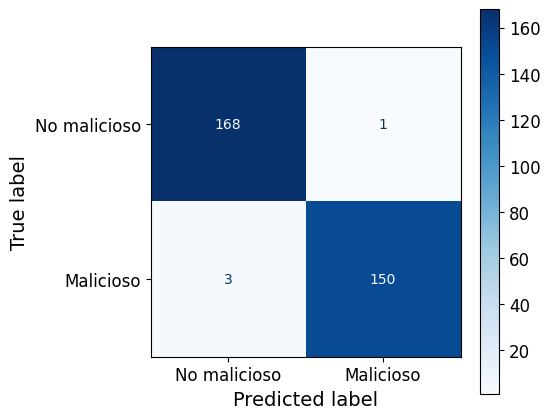

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# Crear una instancia del modelo KNeighborsClassifier con los mejores hiperparámetros
best_model1 = KNeighborsClassifier(**best_params)

# Ajustar los datos de entrenamiento con el nuevo modelo
best_model1.fit(X_train, y_train)

# Realizar predicciones utilizando el modelo ajustado
predictions = best_model1.predict(X_test)

# Evaluar el modelo con las predicciones obtenidas
accuracy = accuracy_score(y_test, predictions)
print('Precisión del modelo con los mejores hiperparámetros: {:.2f}%'.format(accuracy * 100))
# Se calcula la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print('Precisión del modelo: {:.2f}%'.format(accuracy * 100))
# Recall
recall = recall_score(y_test, predictions)
print('Recall: {:.2f}%'.format(recall * 100))
# Precisión
precision = precision_score(y_test, predictions)
print('Precisión: {:.2f}%'.format(precision * 100))
# F1 Score
f1 = f1_score(y_test, predictions)
print('F1 Score: {:.2f}%'.format(f1 * 100))

print("Matriz de confusión:")

# Se imprime la matriz de confusión
# Se imprime la matriz de confusión
cm = confusion_matrix(y_test, predictions)
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No malicioso", "Malicioso"])

# Dibuja la matriz de confusión
fig, ax = plt.subplots(figsize=(5, 5))  
cmd.plot(ax=ax, cmap=plt.cm.Blues)

Precisión del modelo: 98.14%
Recall: 96.08%
Precisión: 100.00%
F1 Score: 98.00%
Matriz de confusión:


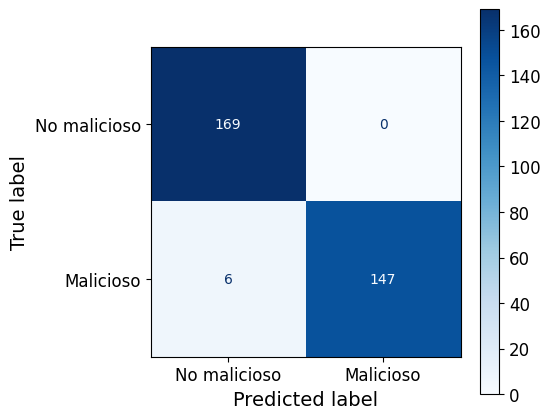

In [11]:
model = KNeighborsClassifier()

# Se entrena el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Se hacen predicciones con los datos de prueba
predictions = model.predict(X_test)

# Se imprime el reporte de clasificación
#print(classification_report(y_test, predictions))

# Se calcula la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print('Precisión del modelo: {:.2f}%'.format(accuracy * 100))
# Recall
recall = recall_score(y_test, predictions)
print('Recall: {:.2f}%'.format(recall * 100))
# Precisión
precision = precision_score(y_test, predictions)
print('Precisión: {:.2f}%'.format(precision * 100))
# F1 Score
f1 = f1_score(y_test, predictions)
print('F1 Score: {:.2f}%'.format(f1 * 100))

print("Matriz de confusión:")

# Se imprime la matriz de confusión
# Se imprime la matriz de confusión
cm = confusion_matrix(y_test, predictions)
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No malicioso", "Malicioso"])

# Dibuja la matriz de confusión
fig, ax = plt.subplots(figsize=(5, 5))  
cmd.plot(ax=ax, cmap=plt.cm.Blues)

# LogisticRegression

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Definir los hiperparámetros y sus posibles valores para la búsqueda
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000,2000, 3000]
}


# Crear una instancia del modelo LogisticRegression
model = LogisticRegression()

# Aplicar Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y puntuaciones
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Crear un nuevo modelo con los mejores hiperparámetros y ajustar los datos
best_model = LogisticRegression(**best_params)
best_model.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print('Mejores hiperparámetros encontrados:', best_params)
print('Precisión del modelo con los mejores hiperparámetros: {:.8f}'.format(accuracy))


C:\Users\052fe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\052fe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\052fe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\052fe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\052fe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterati

Mejores hiperparámetros encontrados: {'C': 10, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Precisión del modelo con los mejores hiperparámetros: 0.98757764


C:\Users\052fe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Precisión del modelo: 98.76%
Recall: 97.39%
Precisión: 100.00%
F1 Score: 98.68%
Matriz de confusión:


C:\Users\052fe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


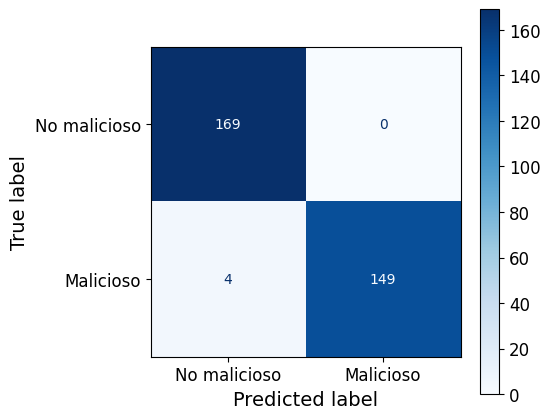

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Crear una instancia del modelo LogisticRegression con los mejores hiperparámetros
best_model2 = LogisticRegression(**best_params)

# Ajustar los datos de entrenamiento con el nuevo modelo
best_model2.fit(X_train, y_train)

# Realizar predicciones utilizando el modelo ajustado
predictions = best_model2.predict(X_test)

# Evaluar el modelo con las predicciones obtenidas
accuracy = accuracy_score(y_test, predictions)
print('Precisión del modelo: {:.2f}%'.format(accuracy * 100))

# Calcular otras métricas de evaluación
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print('Recall: {:.2f}%'.format(recall * 100))
print('Precisión: {:.2f}%'.format(precision * 100))
print('F1 Score: {:.2f}%'.format(f1 * 100))

print("Matriz de confusión:")
cm = confusion_matrix(y_test, predictions)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No malicioso", "Malicioso"])

# Dibuja la matriz de confusión
fig, ax = plt.subplots(figsize=(5, 5))
cmd.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()


Precisión del modelo: 85.40%
Recall: 71.90%
Precisión: 96.49%
F1 Score: 82.40%
Matriz de confusión:


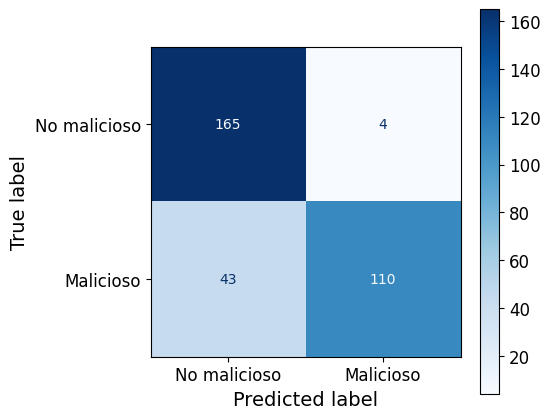

In [14]:
model = LogisticRegression(max_iter=1000)
# Se entrena el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Se hacen predicciones con los datos de prueba
predictions = model.predict(X_test)

# Se imprime el reporte de clasificación
#print(classification_report(y_test, predictions))

# Se calcula la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print('Precisión del modelo: {:.2f}%'.format(accuracy * 100))
# Recall
recall = recall_score(y_test, predictions)
print('Recall: {:.2f}%'.format(recall * 100))
# Precisión
precision = precision_score(y_test, predictions)
print('Precisión: {:.2f}%'.format(precision * 100))
# F1 Score
f1 = f1_score(y_test, predictions)
print('F1 Score: {:.2f}%'.format(f1 * 100))

print("Matriz de confusión:")

# Se imprime la matriz de confusión
cm = confusion_matrix(y_test, predictions)
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No malicioso", "Malicioso"])

# Dibuja la matriz de confusión
fig, ax = plt.subplots(figsize=(5, 5))  
cmd.plot(ax=ax, cmap=plt.cm.Blues)

# LinearSVC

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Definir los hiperparámetros y sus posibles valores para la búsqueda
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'max_iter': [1000, 2000, 3000]
}

# Crear una instancia del modelo LinearSVC
model = LinearSVC()

# Aplicar Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y puntuaciones
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Crear un nuevo modelo con los mejores hiperparámetros y ajustar los datos
best_model = LinearSVC(**best_params)
best_model.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print('Mejores hiperparámetros encontrados:', best_params)
print('Precisión del modelo con los mejores hiperparámetros: {:.8f}'.format(accuracy))


C:\Users\052fe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\052fe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\052fe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\052fe\AppData\Local\Programs\

Mejores hiperparámetros encontrados: {'C': 10, 'max_iter': 1000, 'penalty': 'l2'}
Precisión del modelo con los mejores hiperparámetros: 0.89440994


Precisión del modelo: 89.44%
Recall: 78.43%
Precisión: 99.17%
F1 Score: 87.59%
Matriz de confusión:


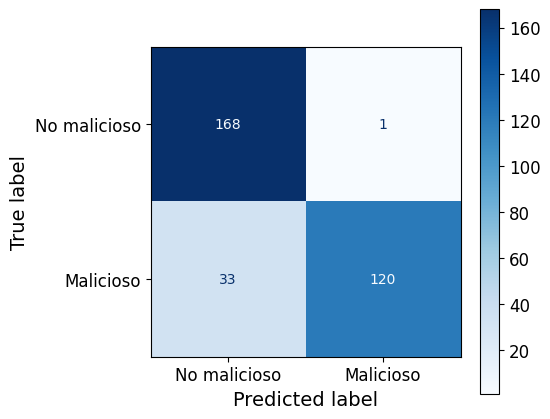

In [16]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Crear una instancia del modelo LinearSVC con los mejores hiperparámetros
best_model3 = LinearSVC(**best_params)

# Ajustar los datos de entrenamiento con el nuevo modelo
best_model3.fit(X_train, y_train)

# Realizar predicciones utilizando el modelo ajustado
predictions = best_model3.predict(X_test)

# Evaluar el modelo con las predicciones obtenidas
accuracy = accuracy_score(y_test, predictions)
print('Precisión del modelo: {:.2f}%'.format(accuracy * 100))

# Calcular otras métricas de evaluación
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print('Recall: {:.2f}%'.format(recall * 100))
print('Precisión: {:.2f}%'.format(precision * 100))
print('F1 Score: {:.2f}%'.format(f1 * 100))

print("Matriz de confusión:")
cm = confusion_matrix(y_test, predictions)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No malicioso", "Malicioso"])

# Dibuja la matriz de confusión
fig, ax = plt.subplots(figsize=(5, 5))
cmd.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()


Precisión del modelo: 86.65%
Recall: 73.86%
Precisión: 97.41%
F1 Score: 84.01%
Matriz de confusión:


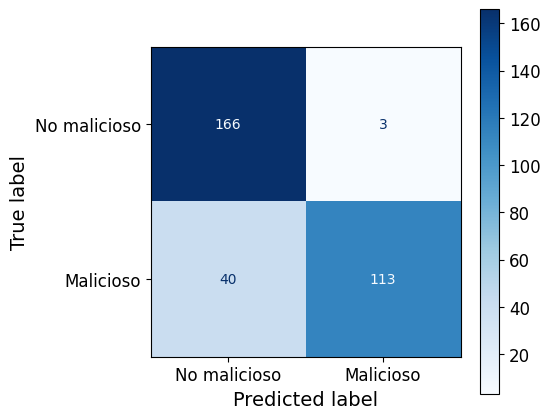

In [17]:

model = LinearSVC(max_iter=1000)
# Se entrena el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Se hacen predicciones con los datos de prueba
predictions = model.predict(X_test)

# Se imprime el reporte de clasificación
#print(classification_report(y_test, predictions))

# Se calcula la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print('Precisión del modelo: {:.2f}%'.format(accuracy * 100))
# Recall
recall = recall_score(y_test, predictions)
print('Recall: {:.2f}%'.format(recall * 100))
# Precisión
precision = precision_score(y_test, predictions)
print('Precisión: {:.2f}%'.format(precision * 100))
# F1 Score
f1 = f1_score(y_test, predictions)
print('F1 Score: {:.2f}%'.format(f1 * 100))

print("Matriz de confusión:")

# Se imprime la matriz de confusión
cm = confusion_matrix(y_test, predictions)
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No malicioso", "Malicioso"])

# Dibuja la matriz de confusión
fig, ax = plt.subplots(figsize=(5, 5))  
cmd.plot(ax=ax, cmap=plt.cm.Blues)

# Perceptron

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Definir los hiperparámetros y sus posibles valores para la búsqueda
param_grid = {
    'penalty': [None, 'l1', 'l2', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [1000, 2000, 3000],
    'eta0': [0.1, 0.01, 0.001]
}

# Crear una instancia del modelo Perceptron
model = Perceptron()

# Aplicar Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y puntuaciones
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Crear un nuevo modelo con los mejores hiperparámetros y ajustar los datos
best_model = Perceptron(**best_params)
best_model.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print('Mejores hiperparámetros encontrados:', best_params)
print('Precisión del modelo con los mejores hiperparámetros: {:.8f}'.format(accuracy))


Mejores hiperparámetros encontrados: {'alpha': 0.0001, 'eta0': 0.1, 'max_iter': 1000, 'penalty': 'l2'}
Precisión del modelo con los mejores hiperparámetros: 0.81055901


Precisión del modelo: 81.06%
Recall: 60.13%
Precisión: 100.00%
F1 Score: 75.10%
Matriz de confusión:


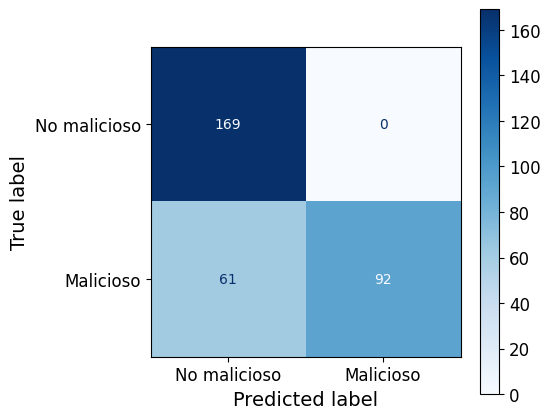

In [19]:
# Crear una instancia del modelo Perceptron con los mejores hiperparámetros
best_model4 = Perceptron(**best_params)

# Ajustar los datos de entrenamiento con el nuevo modelo
best_model4.fit(X_train, y_train)

# Realizar predicciones utilizando el modelo ajustado
predictions = best_model4.predict(X_test)

# Evaluar el modelo con las predicciones obtenidas
accuracy = accuracy_score(y_test, predictions)
print('Precisión del modelo: {:.2f}%'.format(accuracy * 100))

# Calcular otras métricas de evaluación
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print('Recall: {:.2f}%'.format(recall * 100))
print('Precisión: {:.2f}%'.format(precision * 100))
print('F1 Score: {:.2f}%'.format(f1 * 100))

print("Matriz de confusión:")
cm = confusion_matrix(y_test, predictions)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No malicioso", "Malicioso"])

# Dibuja la matriz de confusión
fig, ax = plt.subplots(figsize=(5, 5))
cmd.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()



Precisión del modelo: 85.71%
Recall: 69.93%
Precisión: 100.00%
F1 Score: 82.31%
Matriz de confusión:


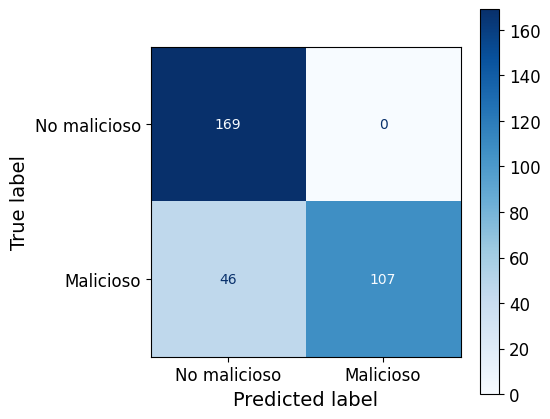

In [20]:
import matplotlib.pyplot as plt

model = Perceptron()
# Se entrena el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Se hacen predicciones con los datos de prueba
predictions = model.predict(X_test)

# Se imprime el reporte de clasificación
#print(classification_report(y_test, predictions))

# Se calcula la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print('Precisión del modelo: {:.2f}%'.format(accuracy * 100))
# Recall
recall = recall_score(y_test, predictions)
print('Recall: {:.2f}%'.format(recall * 100))
# Precisión
precision = precision_score(y_test, predictions)
print('Precisión: {:.2f}%'.format(precision * 100))
# F1 Score
f1 = f1_score(y_test, predictions)
print('F1 Score: {:.2f}%'.format(f1 * 100))

print("Matriz de confusión:")

# Se imprime la matriz de confusión
cm = confusion_matrix(y_test, predictions)
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No malicioso", "Malicioso"])

# Dibuja la matriz de confusión
fig, ax = plt.subplots(figsize=(5, 5))  
cmd.plot(ax=ax, cmap=plt.cm.Blues)
     

# RandomForestClassifier

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Desactivar las advertencias
#warnings.filterwarnings("ignore")

# Definir los hiperparámetros y sus posibles valores para la búsqueda
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None, 0.5, 0.8]
}

# Crear una instancia del modelo RandomForestClassifier
model = RandomForestClassifier()

# Aplicar Grid Search con validación cruzada
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y puntuaciones
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Crear un nuevo modelo con los mejores hiperparámetros y ajustar los datos
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

# Realizar validación cruzada en el mejor modelo
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
cv_mean_score = cv_scores.mean()

print('Mejores hiperparámetros encontrados:', best_params)
print('Precisión del modelo con los mejores hiperparámetros: {:.8f}'.format(accuracy))
print('Precisión media de validación cruzada:', cv_mean_score)



Mejores hiperparámetros encontrados: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Precisión del modelo con los mejores hiperparámetros: 1.00000000
Precisión media de validación cruzada: 1.0


Precisión del modelo: 100.00%
Recall: 100.00%
Precisión: 100.00%
F1 Score: 100.00%
Matriz de confusión:


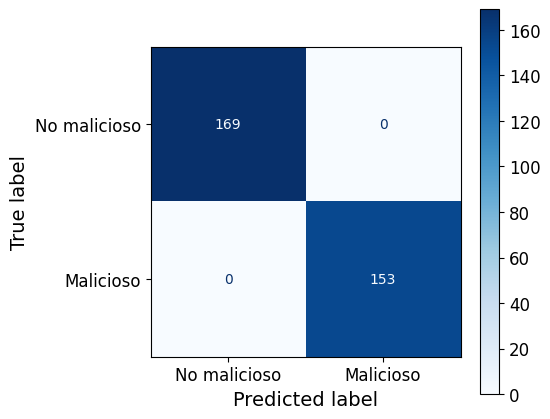

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Crear una instancia del modelo RandomForestClassifier con los mejores hiperparámetros
best_model5 = RandomForestClassifier(**best_params)

# Se entrena el modelo con los datos de entrenamiento
best_model5.fit(X_train, y_train)

# Se hacen predicciones con los datos de prueba
predictions = best_model5.predict(X_test)

# Se imprime el reporte de clasificación
#print(classification_report(y_test, predictions))

# Se calcula la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print('Precisión del modelo: {:.2f}%'.format(accuracy * 100))

# Recall
recall = recall_score(y_test, predictions)
print('Recall: {:.2f}%'.format(recall * 100))

# Precisión
precision = precision_score(y_test, predictions)
print('Precisión: {:.2f}%'.format(precision * 100))

# F1 Score
f1 = f1_score(y_test, predictions)
print('F1 Score: {:.2f}%'.format(f1 * 100))

print("Matriz de confusión:")
# Se imprime la matriz de confusión
cm = confusion_matrix(y_test, predictions)
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No malicioso", "Malicioso"])

# Dibuja la matriz de confusión
fig, ax = plt.subplots(figsize=(5, 5))
cmd.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()


Precisión del modelo: 100.00%
Recall: 100.00%
Precisión: 100.00%
F1 Score: 100.00%
Matriz de confusión:


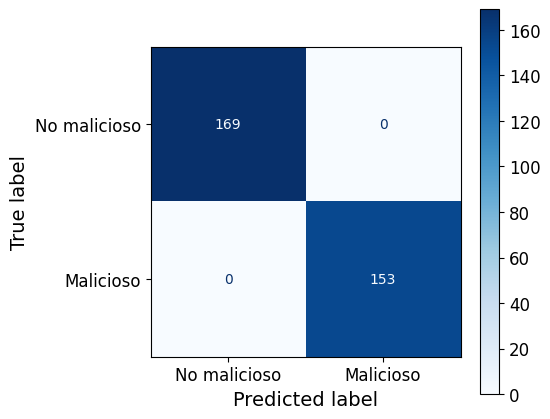

In [23]:
model = RandomForestClassifier()
# Se entrena el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Se hacen predicciones con los datos de prueba
predictions = model.predict(X_test)

# Se imprime el reporte de clasificación
#print(classification_report(y_test, predictions))

# Se calcula la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print('Precisión del modelo: {:.2f}%'.format(accuracy * 100))
# Recall
recall = recall_score(y_test, predictions)
print('Recall: {:.2f}%'.format(recall * 100))
# Precisión
precision = precision_score(y_test, predictions)
print('Precisión: {:.2f}%'.format(precision * 100))
# F1 Score
f1 = f1_score(y_test, predictions)
print('F1 Score: {:.2f}%'.format(f1 * 100))

print("Matriz de confusión:")
# Se imprime la matriz de confusión
cm = confusion_matrix(y_test, predictions)
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No malicioso", "Malicioso"])

# Dibuja la matriz de confusión
fig, ax = plt.subplots(figsize=(5, 5))  
cmd.plot(ax=ax, cmap=plt.cm.Blues)

In [24]:
from sklearn.ensemble import VotingClassifier
# Crear el ensemble classifier con votación mayoritaria
ensemble_model = VotingClassifier(estimators=[('lr', best_model2), ('perceptron', best_model4), ('lsvc', best_model3), ('rf', best_model5), ('knn', best_model1)], voting='hard')

# Entrenar el ensemble classifier
ensemble_model.fit(X_train, y_train)

# Hacer predicciones con el ensemble classifier
predictions = ensemble_model.predict(X_test)

# Evaluar el rendimiento del ensemble classifier
accuracy = accuracy_score(y_test, predictions)
print('Precisión del ensemble classifier: {:.2f}%'.format(accuracy * 100))

Precisión del ensemble classifier: 98.76%


C:\Users\052fe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
